In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import openaq
import warnings

#Code based off examples found at: https://dhhagan.github.io/py-openaq/tutorial/api.html#locations

warnings.simplefilter('ignore')

%matplotlib inline

# Set major seaborn asthetics
sns.set("notebook", style='ticks', font_scale=1.0)

# Increase the quality of inline plots
mpl.rcParams['figure.dpi']= 500

api = openaq.OpenAQ()

In [3]:
#Possible parameters of interest

res = api.parameters(df=True)

print (res)

                                         description    id   name  \
0                                       Black Carbon    bc     BC   
1                                    Carbon Monoxide    co     CO   
2                                   Nitrogen Dioxide   no2    NO2   
3                                              Ozone    o3     O3   
4  Particulate matter less than 10 micrometers in...  pm10   PM10   
5  Particulate matter less than 2.5 micrometers i...  pm25  PM2.5   
6                                     Sulfur Dioxide   so2    SO2   

  preferredUnit  
0         µg/m³  
1           ppm  
2           ppm  
3           ppm  
4         µg/m³  
5         µg/m³  
6           ppm  


In [4]:
resp = api.cities(df=True, limit=100000)

print (resp.query("country == 'US'"))

                                          city   count country  locations
1834                               YELLOWSTONE   15137      US          2
1835          Poughkeepsie-Newburgh-Middletown   29233      US          4
1836             San Francisco-Oakland-Fremont  753006      US         16
1837               Dallas-Fort Worth-Arlington  417845      US         19
1838                                  Granbury   18300      US          1
1839                                     ADAMS   51524      US          2
1840                         Birmingham-Hoover  235121      US         12
1841                                Huntsville   16588      US          1
1842                                 Anchorage   61063      US          2
1843                                      GILA   44165      US          4
1844             Little Rock-North Little Rock   65777      US          3
1845          Riverside-San Bernardino-Ontario  733459      US         22
1846                 Santa Barbara-San

In [5]:
res = api.locations(city='Boston-Cambridge-Quincy', df=True)


print(res)
print(res.ix[0])

                      city  coordinates.latitude  coordinates.longitude  \
0  Boston-Cambridge-Quincy              42.34890              -71.09770   
1  Boston-Cambridge-Quincy              42.36310              -71.05420   
2  Boston-Cambridge-Quincy              42.32940              -71.08250   
3  Boston-Cambridge-Quincy              42.62670              -71.36220   
4  Boston-Cambridge-Quincy              42.21170              -71.11440   
5  Boston-Cambridge-Quincy              42.77080              -71.10280   
6  Boston-Cambridge-Quincy              42.47470              -70.97190   
7  Boston-Cambridge-Quincy              43.04527              -70.71396   
8  Boston-Cambridge-Quincy              43.07537              -70.74802   
9  Boston-Cambridge-Quincy              42.62670              -71.36220   

   count country        firstUpdated         lastUpdated  \
0  17851      US 2016-03-10 07:00:00 2019-02-04 05:00:00   
1   3267      US 2016-03-10 07:00:00 2018-04-04 14:00:

In [6]:
res = api.locations(city='Boston-Cambridge-Quincy', parameter='pm25', df=True)

res.head(10)

,city,coordinates.latitude,coordinates.longitude,count,country,firstUpdated,lastUpdated,location,parameters,sourceName,sourceNames
0,Boston-Cambridge-Quincy,42.36310,-71.05420,3267,US,2016-03-10 07:00:00,2018-04-04 14:00:00,Boston - North End,[pm25],AirNow,[AirNow]
1,Boston-Cambridge-Quincy,42.32940,-71.08250,7018,US,2016-03-11 17:00:00,2019-02-04 05:00:00,Boston - Roxbury,[pm25],AirNow,[AirNow]
2,Boston-Cambridge-Quincy,42.77080,-71.10280,9433,US,2016-03-10 07:00:00,2019-02-04 05:00:00,Haverhill,[pm25],AirNow,[AirNow]
3,Boston-Cambridge-Quincy,42.47470,-70.97190,9025,US,2016-03-10 07:00:00,2019-02-04 05:00:00,LYNN,[pm25],AirNow,[AirNow]
4,Boston-Cambridge-Quincy,43.07537,-70.74802,7566,US,2016-03-10 07:00:00,2019-02-04 05:00:00,Portsmouth,[pm25],AirNow,[AirNow]


In [35]:
res = api.measurements(city='Boston-Cambridge-Quincy', parameter='pm25', limit=100000, df=True)
res2 = api.measurements(city='Delhi', parameter='pm25', limit=100000, df=True)

old_res1 = res
old_res2 = res2

res = res.append(res2)

# Print out the statistics on a per-location basiss
res.groupby(['location'])['value'].describe()

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
"Alipur, Delhi - DPCC",299.0,277.528428,96.661356,81.00,212.0000,277.000,333.0000,565.00
"Anand Vihar, Delhi - DPCC",263.0,315.828897,146.179244,93.00,213.0000,288.000,400.0000,738.00
"Ashok Vihar, Delhi - DPCC",303.0,352.514851,152.817661,90.00,261.0000,310.000,436.0000,817.00
"Aya Nagar, Delhi - IMD",147.0,188.329320,70.302243,62.26,141.6200,176.970,225.2550,398.77
"Bawana, Delhi - DPCC",301.0,181.933555,132.719161,70.00,123.0000,140.000,172.0000,989.00
Boston - Roxbury,1769.0,9.161673,4.719614,-2.00,6.0000,8.000,12.0000,57.00
"Burari Crossing, Delhi - IMD",263.0,265.382586,238.594514,0.00,149.7500,234.050,290.5800,1823.52
"CRRI Mathura Road, Delhi - IMD",183.0,284.244918,111.789758,61.61,215.2450,256.820,338.4950,526.43
"DTU, Delhi - CPCB",285.0,324.596491,163.975657,0.00,220.0000,292.000,381.0000,834.00


In [36]:
res3 = api.measurements(city='Delhi', location='Anand Vihar, Delhi - DPCC', parameter='pm25', limit=100000, df=True)
res4 = api.measurements(city='Delhi', location='Jahangirpuri, Delhi - DPCC', parameter='pm25', limit=100000, df=True)
res5 = api.measurements(city='Delhi', location='Wazirpur, Delhi - DPCC', parameter='pm25', limit=100000, df=True)

final_res = old_res1.append(res3).append(res4).append(res5)


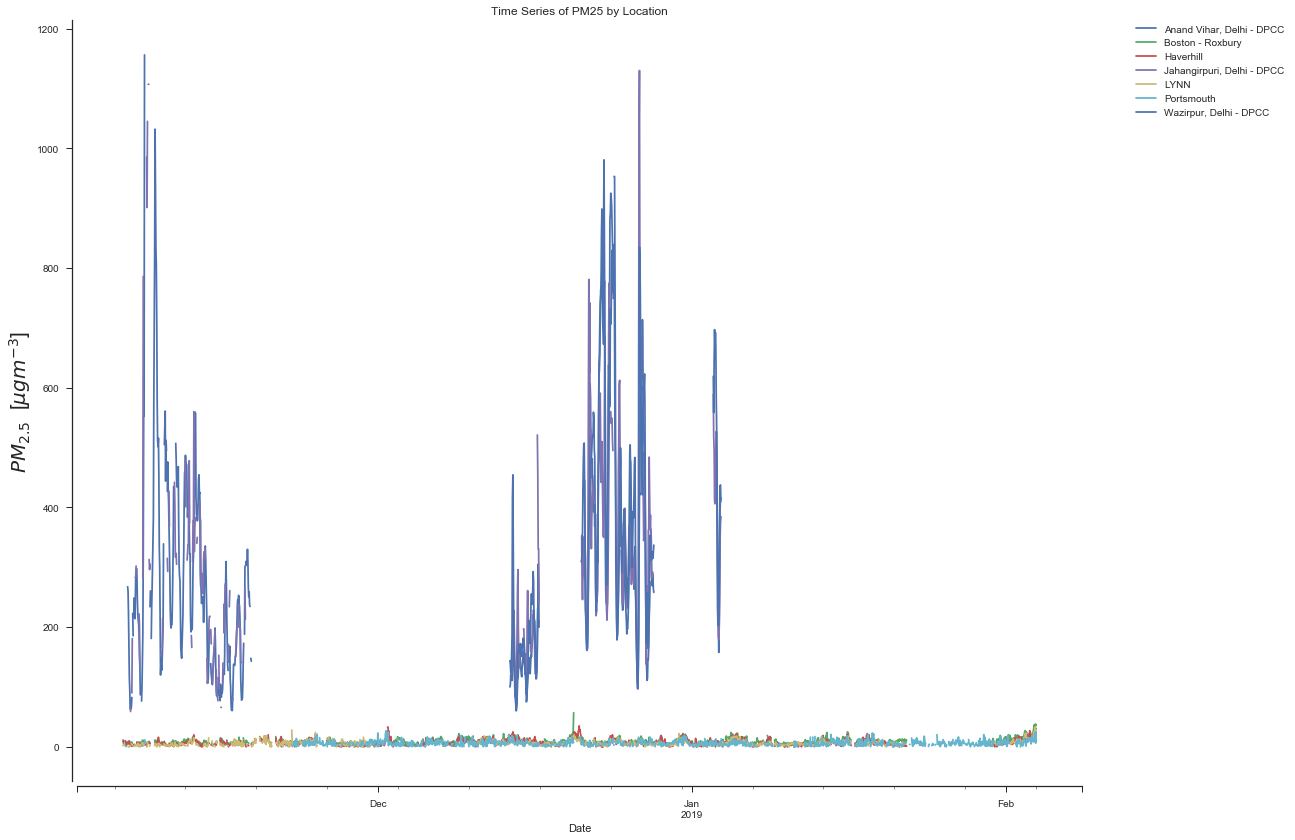

In [39]:
fig, ax = plt.subplots(1, figsize=(18, 14))

#groups_of_interest = ['Boston - Roxbury', 'Portsmouth', 'Haverhill', ]

for group, df in final_res.groupby('location'):
    # Query the data to only get positive values and resample to hourly
    #if group in groups_of_interest:
    _df = df.query("value >= 0.0").resample('1h').mean()

    _df.value.plot(ax=ax, label=group)

ax.legend(loc='best')
ax.set_ylabel("$PM_{2.5}$  [$\mu g m^{-3}$]", fontsize=20)
ax.set_xlabel("Date")
ax.set_title('Time Series of PM25 by Location')
sns.despine(offset=5)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

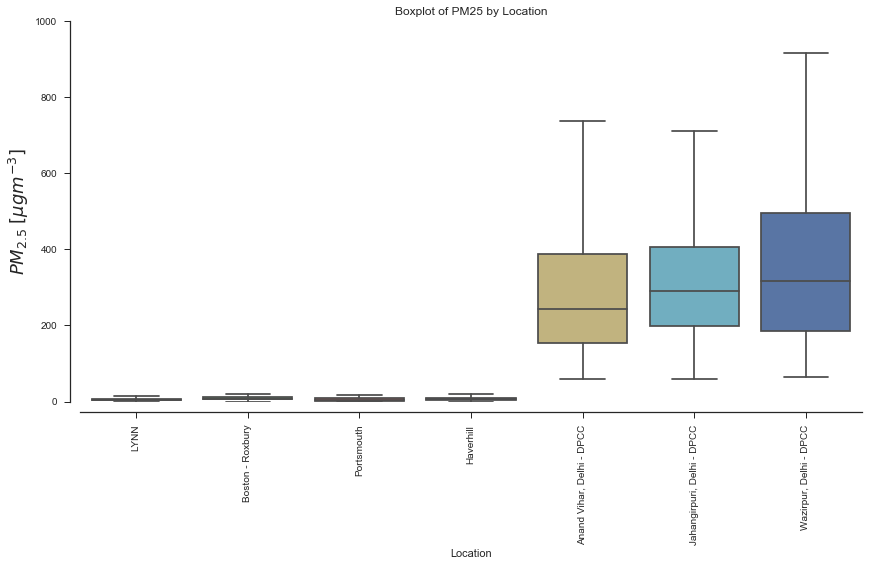

In [38]:
fig, ax = plt.subplots(1, figsize=(14,7))

ax = sns.boxplot(
    x='location',
    y='value',
    data=final_res.query("value >= 0.0"),
    fliersize=0,
    palette='deep',
    ax=ax)

ax.set_ylim([0, 1000])
ax.set_ylabel("$PM_{2.5}\;[\mu gm^{-3}]$", fontsize=18)
ax.set_xlabel("Location")
ax.set_title('Boxplot of PM25 by Location')

sns.despine(offset=10)

plt.xticks(rotation=90)
plt.show()